1.Simple Linear Regression model is the linear relationship between 2 variables, predictor variable(x) and outcome variable(Y). Outcome variable depends on the predictor variable and some random error. The linear model for each observation is, 

Y = \beta_0 + \beta_1 X + \epsilon
where  \epsilon \sim \mathcal{N}(0, \sigma^2) 

-The outcome variable (Y) is a continous numerical variable while the predictor variable (x) can be catergorical or continous.
-This epselon counts for the random error. 
-Beta note is the intercept of the Y-x relationship and has no influence from x
-Beta 1 is the coefficient or of x and it estimates the average chnage in the outcome variable for "1 unit" increase of predictor variable.

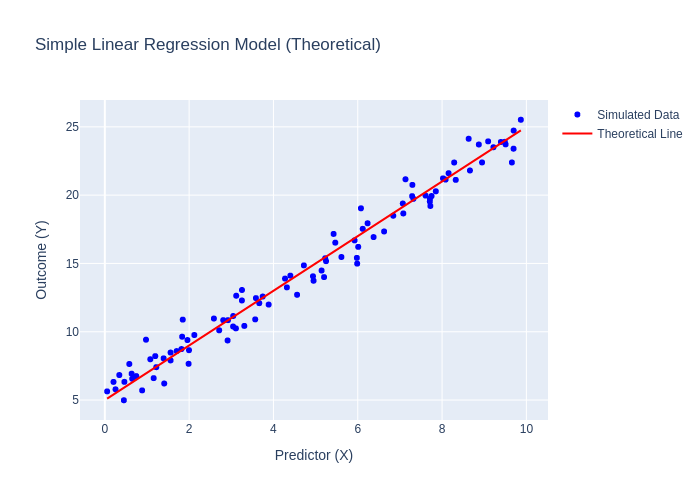

In [6]:
import numpy as np
from scipy.stats import norm, uniform
import plotly.graph_objects as go

# Model parameters
n = 100                   # Number of data points
beta_0 = 5                # Intercept
beta_1 = 2                # Slope
sigma = 1                 # Standard deviation of the error term

# Generate predictor values (X) and error term (ε)
np.random.seed(42)
X = uniform.rvs(0, 10, size=n)  # Sample X from a uniform distribution over [0,10]
errors = norm.rvs(0, sigma, size=n)  # Error term from a normal distribution with mean 0 and std dev sigma

# Calculate outcome values (Y) based on the theoretical model
Y = beta_0 + beta_1 * X + errors

# Create the line for Y = β₀ + β₁X without noise for visualization
Y_true = beta_0 + beta_1 * X

# Plot with Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=X, y=Y, mode='markers', name='Simulated Data', marker=dict(color='blue')))
fig.add_trace(go.Scatter(x=X, y=Y_true, mode='lines', name='Theoretical Line', line=dict(color='red')))
fig.update_layout(title="Simple Linear Regression Model (Theoretical)",
                  xaxis_title="Predictor (X)", yaxis_title="Outcome (Y)")
fig.show(renderer="png")

ChatBot Summary:

 This chat explained the theoretical Simple Linear Regression (SLR) model, highlighting key components: predictor (X), intercept (\beta_0), slope (\beta_1), error term (\epsilon), and outcome (Y). The code provided illustrates the model by generating predictors X (using a uniform distribution) and adding normally distributed error to calculate Y based on the SLR equation Y = \beta_0 + \beta_1 X + \epsilon. Finally, we used plotly.graph_objects to visualize the theoretical line Y = \beta_0 + \beta_1 X and the scatter of simulated data points around it, without fitting any model to the data.
 
ChatGPT Link: https://chatgpt.com/share/6722f732-6bc8-8009-93f3-7b960f13de91

2.

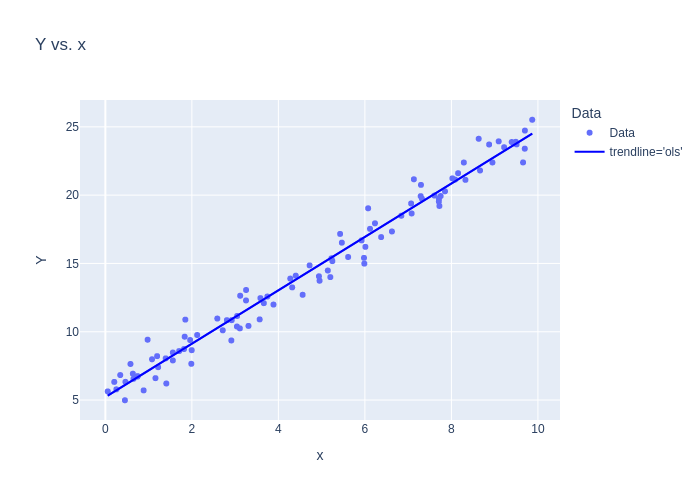

In [7]:
import numpy as np
import pandas as pd
import plotly.express as px
import statsmodels.formula.api as smf  # allows us to specify statistical models using formulas

# Parameters for the theoretical model
n = 100
beta_0 = 5
beta_1 = 2
sigma = 1

# Simulate data
np.random.seed(42)
X = np.random.uniform(0, 10, n)
errors = np.random.normal(0, sigma, n)
Y = beta_0 + beta_1 * X + errors

# Combine into a DataFrame
df = pd.DataFrame({'x': X, 'Y': Y})

# Fit the SLR model
# `smf` is used to specify statistical models using formulas, similar to R-style syntax.
model_data_specification = smf.ols("Y ~ x", data=df)  # Specifies the model as Y ~ x.
fitted_model = model_data_specification.fit()          # Fits the specified model to the data.

# Summaries and model diagnostics
fitted_model.summary()             # Provides a detailed statistical summary of the fitted model.
fitted_model.summary().tables[1]   # Shows a summary table of model parameters, errors, and significance levels.
fitted_model.params                # Returns the estimated parameters (intercept and slope).
fitted_model.params.values         # Returns just the values of the estimated parameters as a numpy array.
fitted_model.rsquared              # Gives the R-squared value, representing model fit.

# Visualization
df['Data'] = 'Data'  # Adds a 'Data' label for the legend

fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')
# `trendline='ols'` in px.scatter fits and visualizes an OLS (Ordinary Least Squares) trend line for the data

# Manually add the fitted line if needed (this is what trendline='ols' does under the hood)
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

fig.show(renderer="png")

ChatBot Summary:
In this chat, we demonstrated how to simulate data from a theoretical Simple Linear Regression model, then used pandas and statsmodels.formula.api (smf) to fit a regression model to the simulated data. We visualized the data and fitted line using plotly.express, utilizing trendline='ols' to display the regression line. Additionally, explanations were provided for interpreting outputs like the model’s summary, parameters, and R-squared, as well as the code steps for setting up and visualizing the fitted model.

ChatGPT Link: https://chatgpt.com/share/6722f732-6bc8-8009-93f3-7b960f13de91

3.The Orange dashed line(theoretical line) estimates the oucome varibale(Y) from the equation  Y = \beta_0 + \beta_1 X . It includes the randomeness of the data accurately.
The Solid line from the trendline='ols'(Fitted line) estimates the statsmodels regression by randomly sampling data points. Because of the sampling variation in each simulation it differs slightly from the theoretical line.

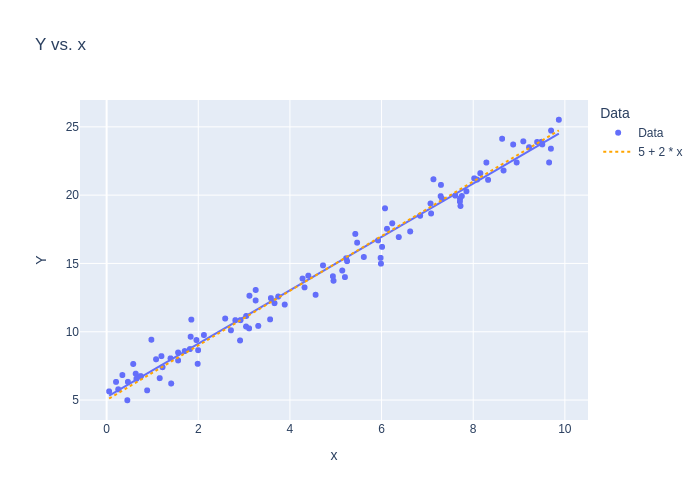

In [8]:
import numpy as np
import pandas as pd
import plotly.express as px
import statsmodels.formula.api as smf

# Parameters for the theoretical model
n = 100
beta_0 = 5
beta_1 = 2
sigma = 1

# Simulate data
np.random.seed(42)
X = np.random.uniform(0, 10, n)
errors = np.random.normal(0, sigma, n)
Y = beta_0 + beta_1 * X + errors

# Combine into a DataFrame
df = pd.DataFrame({'x': X, 'Y': Y})

# Fit the SLR model
model_data_specification = smf.ols("Y ~ x", data=df)
fitted_model = model_data_specification.fit()

# Visualization with both theoretical and fitted lines
df['Data'] = 'Data'

fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# Add the theoretical line (without sampling noise)
x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta_0 + beta_1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta_0)+' + '+str(beta_1)+' * x', 
                line=dict(dash='dot', color='orange'))

fig.show(renderer="png")

ChatBot Summary: 
This chat walked through simulating data from a theoretical Simple Linear Regression (SLR) model, fitting a model to that data, and visualizing both the theoretical and fitted lines. The theoretical line shows the “true” relationship without randomness, while the fitted line is based on simulated data that includes random noise. By comparing the two, we see how sampling variation affects the estimated regression line, demonstrating the impact of random error on model fitting.

ChatGPT Link: https://chatgpt.com/share/6722f732-6bc8-8009-93f3-7b960f13de91

4.Fitted values are an estimate of the simple linear regression model which describes the relationship between the predictor variable(x) and the outcome variable(Y).

The 'fitted_model.summary().tables' contains information on the fitted model, including coefficients, standard error, p_value and etc. The coefficients from this table can be used to derive the fitted values.  This can be done by using 'fitted_model.fittedvalues[1](column 1 is the coef column)'.

The fitted_model.params contains just the coefficients from the fitted_model.summary()tables

Notebook LM summary:Concise Explanation of Fitted Values

The fitted values, represented by $\hat{y}_i$, are the model's predictions for the outcome variable based on the provided predictor values and the determined linear relationship from the fitted model. They can be considered as the values located on the fitted regression line, corresponding to each observed $x_i$ value. However, they should not be seen as "true" predictions because they originate from the same data that was used to fit the model. Instead, think of them as anticipated or average outcome values given the predictor values, assuming the linear relationship is valid.

You can conveniently access these fitted values using the `.fittedvalues` attribute of the fitted model object in `statsmodels`.

**Example:**

Let's assume `fitted_model.params` yields:

```
Intercept      25.0
parent_height   0.6
dtype: float64
```

This indicates that the estimated intercept is 25.0 and the estimated slope coefficient is 0.6. For an observed predictor value of 70, the fitted value would be: $\hat{y}_i = 25.0 + 0.6 * 70 = 67.0$. In other words, the model predicts an outcome value of 67.0 when the predictor is 70.

**Key Points:**

*   Fitted values are determined using the estimated coefficients from the fitted model.
*   They serve as the model's predictions for the outcome variable based on the observed predictor values.
*   While helpful for understanding the estimated linear relationship between variables, they are not true predictions for new data.
*   The `.fittedvalues` attribute allows direct access to these values in `statsmodels`.


5.

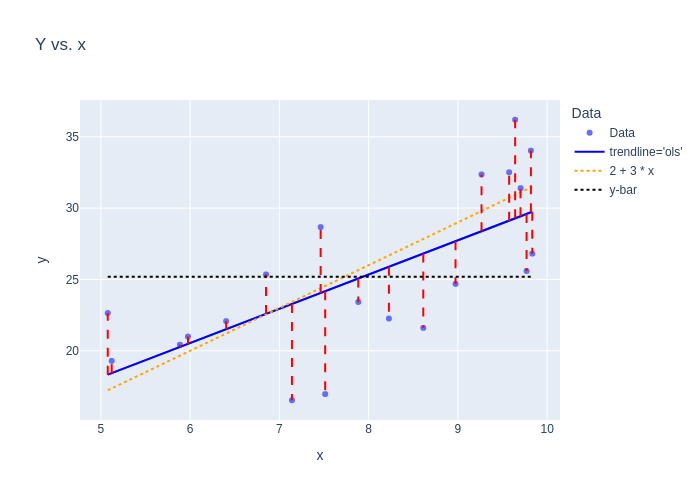

In [9]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

n,x_min,x_range,beta0,beta1,sigma = 20,5,5,2,3,5
x = stats.uniform(x_min, x_range).rvs(size=n)
errors = stats.norm(loc=0, scale=sigma).rvs(size=n)
Y = beta0 + beta1 * x + errors

df = pd.DataFrame({'x': x, 'y': Y})
model_data_specification = smf.ols("Y~x", data=df) 
fitted_model = model_data_specification.fit() 

df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='x',  y='y', color='Data', 
                 trendline='ols', title='Y vs. x')

# This is what `trendline='ols'` is
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

# Add vertical lines for residuals
for i in range(len(df)):
    fig.add_scatter(x=[df['x'][i], df['x'][i]],
                    y=[fitted_model.fittedvalues[i], df['y'][i]],
                    mode='lines',
                    line=dict(color='red', dash='dash'),
                    showlegend=False)
    
# Add horizontal line at y-bar
fig.add_scatter(x=x_range, y=[df['y'].mean()]*2, mode='lines',
                line=dict(color='black', dash='dot'), name='y-bar')

fig.show(renderer="png")

6. 6.

1. 1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()
This formula gives us the proportion of the total variance in Y explained by the model.
(Y-fitted_model.fittedvalues)**2).sum() - sums all the squared residuals
(Y-Y.mean())**2).sum() - sum of allsquared deviations of Y from the mean of Y. 
Dividing the sum of the squared residuals by the sum of total variance, we get the proportion of unexplained variance and deducting that from 1 will give us the proportion of total variance that is explained by the model.

2. fitted_model.rsquared 
This gives the proportion of variance in Y that is explained by the model. Therefore, it measures the accurancy of well the  model captures the variability in Y

3. np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2
This squares the correlation coefficient between the observed Y values and the fitted Y values. Since the correlation coefficient measures the linear relation between Y and it's fitted value, squaring it gives us the proportion of variance in Y explained by the model. Therefore, this captures the accuracy of the model.

4. np.corrcoef(Y,x)[0,1]**2
This squares the correlation coefficient between Y and predictor variable x. Since the model is linear and has only one predictor, this calculation is similiar to the above ones and this gives the proportion of variance in Y that is explained by through the model.

ChatBot Summary: Here’s a summary of our chat:

We explored why certain expressions provide a measure of how well the model explains the variation in ￼:

	1.	The expression ￼ calculates ￼, or the proportion of variation in ￼ explained by the model. It does this by comparing the unexplained variance (residual sum of squares) to the total variance.
	2.	fitted_model.rsquared in statsmodels also calculates ￼, providing a direct measure of the model’s accuracy. A high ￼ indicates a strong fit.
	3.	np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2 calculates ￼ by squaring the correlation between ￼ and the model’s predictions. In simple linear regression, this is equivalent to the ￼ from fitted_model.rsquared. Similarly, np.corrcoef(Y, x)[0,1]**2 also captures ￼ since the model has only one predictor, making the squared correlation between ￼ and ￼ another way to represent the proportion of variation explained.
    
ChatGPT Link: https://chatgpt.com/share/672539ac-7d38-8009-b369-effdecca6a0c

7.Indicate a couple of the assumptions of the Simple Linear Regression model specification that do not seem compatible with the example data below

1. Normality Assumption is not very plausible since the histomgram doesnt appear to to be normally distributed. The histogram appears to be skewed and has outliers, which indicates that the residuals are not normally distributed.

2. Linear Assumption is not plausible either since the realationship between Amount of Fertilizer and Crop Yield doesnt seem to be linear. The yield increases more quickly with more fertilizer and which the linear model is not suitable for these variables.

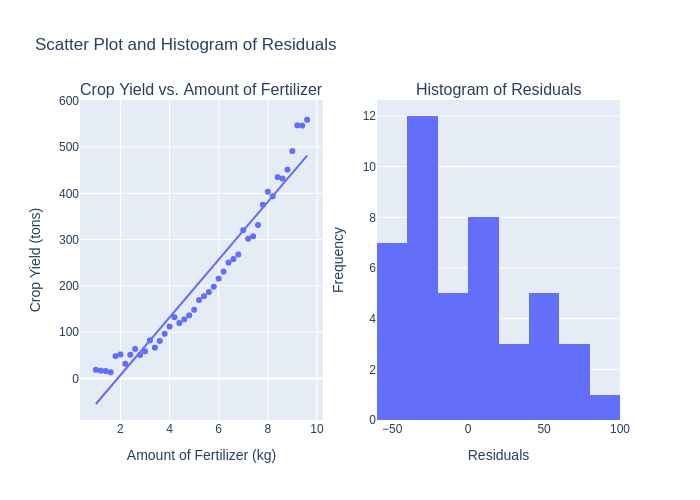

In [10]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png")

ChatBot Summary: This conversation reviewed assumptions of Simple Linear Regression (SLR) for a dataset on fertilizer use and crop yield. We identified that the assumptions of linearity and normality of residuals are likely violated here. The data shows a nonlinear relationship and non-normally distributed residuals, suggesting that a simple linear model may not accurately capture the relationship and that a polynomial regression might be more appropriate.

ChatGPT Link: https://chatgpt.com/share/672539ac-7d38-8009-b369-effdecca6a0c

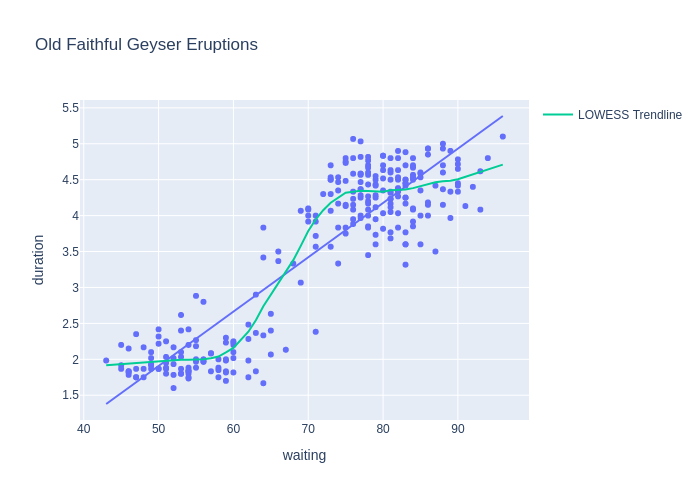

In [11]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png")

In [14]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Sat, 02 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        01:57:35   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

8.When conducting a hypothesis testing to see whether there is. linear association between waiting times and durations of reuptions of the Old Faithful Geyser, 
1. Null Hypothesis(H note) - there is no linear association between waiting and durations and beta 1 = 0
2. Alternate Hypothesis(H 1) - there is a linear association between waiting and duration and beta 1 is not equals to 0

The code shows a fitted model where the coefficient of waiting (slobe, beta1) estimates the change in duration for every 1 minute increase in waiting.
Whereas, the p-value for waiting will show us the strength of evidence against the null hypothesis of beta1=0.
Finally, if the p-value is very small(<0.01), we have strong evidence against the null hypothesis and therefore we can reject the null hypothesis of the waiting and duration not having a linear association. On the other hand, if the p-value is not significantly small(>0.05), we fail to reject the null hypothesis and therefore we do not have sufficient evidence of a linear association between the waiting and dutaion variables. Since the P>|t| = very close to 0(or 0), we can reject the null hypothesis and we have very strong evidence against the null hypothesis.

ChatBot Summary: In this chat, we discussed how to use a linear regression model to assess the relationship between waiting time and eruption duration in the Old Faithful Geyser dataset. Specifically, the null hypothesis here is that there is “no linear association” between these two variables.

We used code to fit a linear model and examined the p-value of the slope coefficient (waiting). The p-value helps us determine if there’s significant evidence of a linear relationship:

	•	A low p-value (e.g., < 0.05) would indicate strong evidence against the null hypothesis, suggesting that longer waiting times are associated with longer eruptions.
	•	A high p-value would mean there’s insufficient evidence to conclude a linear relationship, implying we fail to reject the null hypothesis.

In summary, the analysis and interpretation of the p-value help us understand whether there is a statistically significant linear association between waiting and duration.

ChatGPT Link: https://chatgpt.com/share/672539ac-7d38-8009-b369-effdecca6a0c

9. 
Less than short_wait_limit 62:
P-value for waiting is 0.238 and since it is greater than 0.05, there is week evidence against the null hypotheiss and we cannot reject the null hypothesis. There is insufficient evidence that there is a linear association between eruption duration and waiting times less than 62. 

Less than short_wait_limit 64:
P-value is 0.036 and is less than 0.05, we have moderate evidence against the null hypothesis. This would mean that there is a statistically significant linear relationship between the waiting times less than 64 minutes.

Less than short_wait_limit 66:
P-value is 0 and is much less than 0.001 indicating that there is very strong evidence against the null hypothesis. We can reject the null hypothesis and conclude that there is a significant linear association between waiting time and eruption duration for wait times less than 66 minutes.

In [18]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit =  62 # 66 # 64
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSI

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


10. 

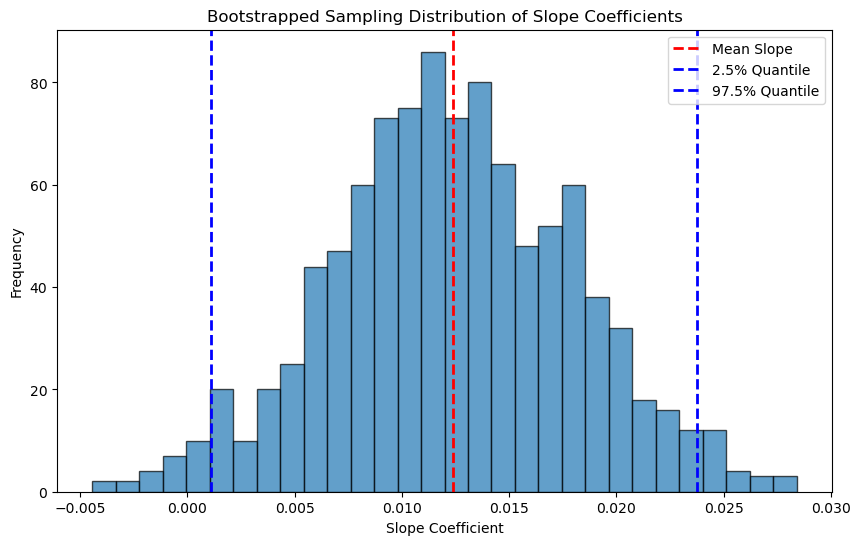

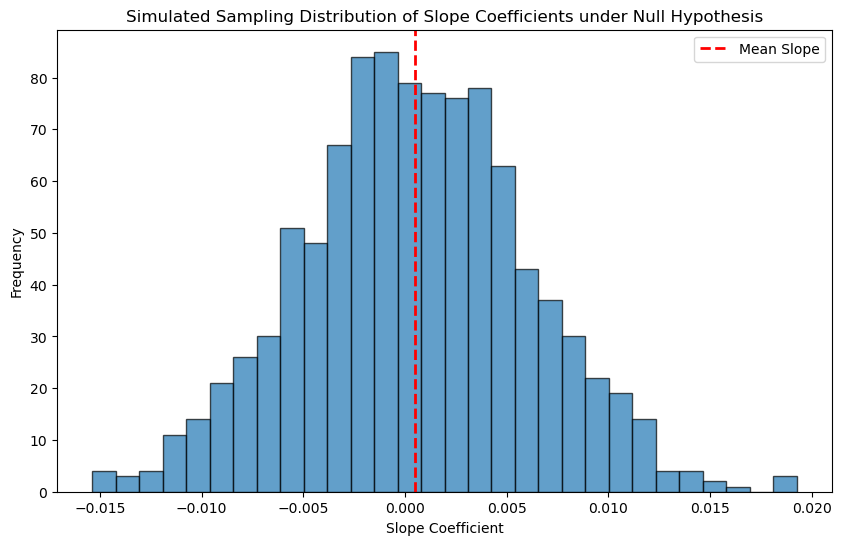

95% Bootstrapped Confidence Interval: [0.00110224 0.0237421 ]
Does the 95% CI contain 0? No
Simulated p-value: 0.025
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


In [25]:
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Define long wait times
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

# Step 1: Bootstrapping
n_bootstrap_samples = 1000  # Number of bootstrap samples
bootstrapped_slope_coefficients = []

for _ in range(n_bootstrap_samples):
    # Create a bootstrap sample
    sample = old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)
    # Fit a simple linear regression model
    model = smf.ols('duration ~ waiting', data=sample).fit()
    # Collect the slope coefficient using iloc
    bootstrapped_slope_coefficients.append(model.params.iloc[1])  # Accessing with iloc

bootstrapped_slope_coefficients = np.array(bootstrapped_slope_coefficients)

# Visualize the bootstrapped sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(bootstrapped_slope_coefficients, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(np.mean(bootstrapped_slope_coefficients), color='red', linestyle='dashed', linewidth=2, label='Mean Slope')
plt.axvline(np.quantile(bootstrapped_slope_coefficients, 0.025), color='blue', linestyle='dashed', linewidth=2, label='2.5% Quantile')
plt.axvline(np.quantile(bootstrapped_slope_coefficients, 0.975), color='blue', linestyle='dashed', linewidth=2, label='97.5% Quantile')
plt.title('Bootstrapped Sampling Distribution of Slope Coefficients')
plt.xlabel('Slope Coefficient')
plt.ylabel('Frequency')
plt.legend()
fig.show(renderer="png")

# Step 2: Simulating under null hypothesis
n_simulations = 1000  # Number of simulations
simulated_slope_coefficients = []

# Create a copy of the dataset for simulation
old_faithful_simulation = old_faithful[long_wait].copy()

# Simulate Y values under null hypothesis
for _ in range(n_simulations):
    old_faithful_simulation['duration'] = 1.65 + 0 * old_faithful_simulation.waiting + stats.norm(loc=0, scale=0.37).rvs(size=old_faithful_simulation.shape[0])
    model_sim = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()
    # Collect the slope coefficient using iloc
    simulated_slope_coefficients.append(model_sim.params.iloc[1])  # Accessing with iloc

simulated_slope_coefficients = np.array(simulated_slope_coefficients)

# Visualize the simulated sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(simulated_slope_coefficients, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(np.mean(simulated_slope_coefficients), color='red', linestyle='dashed', linewidth=2, label='Mean Slope')
plt.title('Simulated Sampling Distribution of Slope Coefficients under Null Hypothesis')
plt.xlabel('Slope Coefficient')
plt.ylabel('Frequency')
plt.legend()
fig.show(renderer="png")

# Step 3: Confidence Interval and p-value
# Calculate the 95% confidence interval from bootstrapped slopes
confidence_interval = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])
print(f'95% Bootstrapped Confidence Interval: {confidence_interval}')

# Check if 0 is in the confidence interval
contains_zero = 0 >= confidence_interval[0] and 0 <= confidence_interval[1]
print(f'Does the 95% CI contain 0? {"Yes" if contains_zero else "No"}')

# Calculate the p-value for the simulated slope coefficients
observed_slope = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().params.iloc[1]  # Accessing with iloc
simulated_p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()
print(f'Simulated p-value: {simulated_p_value}')

# Compare with the OLS summary
print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

ChatBot Summary: Summary of Analysis

	1.	Bootstrapping:
	•	Analyzed 1,000 bootstrap samples from long wait times (waiting > 71 min) to visualize the distribution of slope coefficients from linear regression models and calculated a 95% confidence interval.
	2.	Simulation:
	•	Simulated data under the null hypothesis of no linear association (slope = 0) and plotted the distribution of fitted slope coefficients.
	3.	Confidence Interval & p-value:
	•	Checked if the 95% confidence interval included 0 and calculated a simulated p-value, comparing it with the OLS regression results.

Conclusion

The analysis provided insights into the linear relationship between waiting times and eruption durations of the Old Faithful geyser using bootstrapping and simulation techniques.

ChatGPT Link: https://chatgpt.com/share/672539ac-7d38-8009-b369-effdecca6a0c

11.

In [28]:
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Assuming old_faithful dataset is loaded as 'old_faithful'

# Step 1: Create the 'kind' column to categorize 'waiting' as "short" or "long"
old_faithful['kind'] = old_faithful['waiting'].apply(lambda x: 'short' if x < 68 else 'long')

# Step 2: Fit the regression model with the indicator variable
model = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()

# Step 3: Display the regression summary to check significance of the "long" group
print(model.summary())

# Step 4: Visualize the distribution of durations for each category
fig = px.box(old_faithful, x='kind', y='duration', title='Duration ~ Kind',
             category_orders={'kind': ['short', 'long']})
fig.show()

                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1803.
Date:                Sat, 02 Nov 2024   Prob (F-statistic):          1.60e-121
Time:                        04:22:56   Log-Likelihood:                -144.19
No. Observations:                 272   AIC:                             292.4
Df Residuals:                     270   BIC:                             299.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

1. smf.ols('duration ~ waiting', data=old_faithful)
This model trats waiting as a continous predictor and estinates a linear relationship between waitimes and eruption durations for the entire dataset.

2. smf.ols('duration ~ waiting', data=old_faithful[short_wait])
This model only takes the "short" wait times(<64) and estimates the linear relationship between wait times and durations for these cases. 

3. smf.ols('duration ~ waiting', data=old_faithful[long_wait])
This model only take sthe "long" wait times(>71) and estimates a linear relationship between wait times and eruption durations for these cases.

This new model created with the ki instead of xi. The ki is a categorical variable where it puts each wait time into "short" or "long" wait times if it <68 or >68 respectively. This model categorizes the wait times rather than using sepreate models simliar to the ones above. This provides a direct comparisonof average durations between "short" and "long" wait times. Lets us see if there is a statisticall significant difference in mean durations between the groups.

and report the evidence against a null hypothesis of "no difference between groups "on average") for the new indicator variable based model

Since the P>|t| in the summary for the C(kind, Treatment(reference="short"))[T.long] is 0, the p-value is is significatly less than 0.001 therefore we have strong evidence agianst the null hypothesis which lets us reject the null hythothesis. Since the null hypothesis is that there is no significant difference in duration between the "short" and "long" wait times, rejecting it would suggest that there is a significant difference in duration between the "short" and "long" wait times. 

ChatBot Summary: In this chat, we discussed how to analyze wait times for geyser eruptions by dividing them into “short” (<68) and “long” (≥68) categories and using a linear regression model with an indicator variable for these categories. The new model allows us to test if there’s a significant difference in average eruption durations between the two wait time groups. We also compared this approach to previous models that used either the entire dataset or separate models for “short” and “long” wait times. Finally, we provided code to implement the analysis, fit the model, and visualize the results, along with guidance on interpreting the output.

ChatGPT Link: https://chatgpt.com/share/672539ac-7d38-8009-b369-effdecca6a0c

12. 

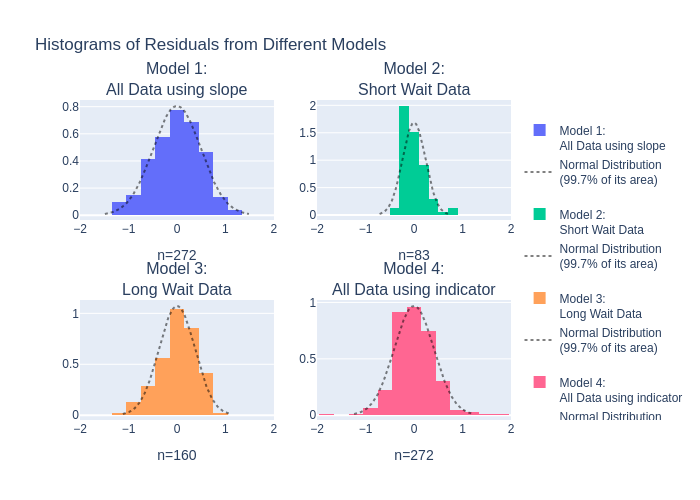

In [29]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png")


Model 1:
Model 1 uses the entire dataset with waiting times as a continous predictor. The residuals in this model are quite symmetric and closely follow the shape of the normal distribtion curve. This model has the highest plausiblity of the residuals being normally distributed.

Medel 2:
This model uses only the "short" wait times. This histogram has a heavy right skew and it deviates from the normal distribution curve. Therefore, the residuals are not normally distributed.

Model 3:
In this model only the "long" wait times are used. This histogram has a heavy left skew with the tail of the skew at the smallerwait times values. Since this also deviates from the normal distribution curve, the residuals are not normally distributed here as well.

Model 4:
This model uses an indicator variable to actergorize the "short" and "long" wait times. The shape of the histogram is somewhat similar to a normally distribution but has some assymetry and irregularity. Specially around the peak. Therefore, the residuals in this model also are not normally distributed.

ChatBot Summary: In this chat, we examined histograms of residuals from four different models to assess which best satisfies the normality assumption in Simple Linear Regression. Model 1 (using all data with a slope) showed residuals that most closely matched a normal distribution, supporting the assumption. Models 2, 3, and 4 deviated from normality, with Model 2 (short wait data) showing the most skewed distribution and thus least supporting the assumption.

ChatGPT Link: https://chatgpt.com/share/672539ac-7d38-8009-b369-effdecca6a0c

13.
a) The permutation test works by the assumption that the null hypothesis is true. By shuffling the labels, so theres a random chance for all the observed differences in mean duration between groups. This helps us determine how likely our observed difference in under null hypothesis. The bootstrapping process estimates the sampling distribution of the differences in mean by repeatedly resampling the observed data. The range of diffrences from the bootstrapped samples gives us the confidence interval for the true difference in means.

b) The Permutation Test does not rely on distributional assumptions like normality and is completely based on observed data, which makes it a non-parametric approach. The indicator variable model on the other hand assumes that the residuals are normally distributed and uses this to calculate the p-value and confidence intervals.
The The permutation bootstrap method requires resampleing and involves many iterations while the indicator model only requires a single model fit which makes it faster. 

In [33]:
import seaborn as sns
import pandas as pd
import numpy as np

# Load the geyser dataset
old_faithful = sns.load_dataset('geyser')

# Define the "short" and "long" wait time categories
old_faithful['kind'] = np.where(old_faithful['waiting'] < 68, 'short', 'long')

# Observed difference in means
observed_diff = old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values[0]

# (A) Permutation Test
num_permutations = 1000
perm_diffs = []

for _ in range(num_permutations):
    # Shuffle the 'kind' labels
    shuffled = old_faithful.assign(kind_shuffled=old_faithful['kind'].sample(frac=1).values)
    # Calculate the difference in mean duration between "shuffled" short and long groups
    perm_diff = shuffled.groupby('kind_shuffled')['duration'].mean().iloc[::-1].diff().values[0]
    perm_diffs.append(perm_diff)

# p-value for the permutation test (two-tailed)
p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))

# (B) Bootstrap Confidence Interval
num_bootstraps = 1000
boot_diffs = []

for _ in range(num_bootstraps):
    # Bootstrap resampling within each group
    boot_sample = old_faithful.groupby('kind').apply(lambda x: x.sample(frac=1, replace=True)).reset_index(drop=True)
    # Calculate the difference in mean duration for bootstrapped samples
    boot_diff = boot_sample.groupby('kind')['duration'].mean().iloc[::-1].diff().values[0]
    boot_diffs.append(boot_diff)

# 95% bootstrap confidence interval
bootstrap_ci = np.quantile(boot_diffs, [0.025, 0.975])

# Display results
print(f"Observed Difference in Means: {observed_diff}")
print(f"Permutation Test p-value: {p_value}")
print(f"95% Bootstrap Confidence Interval for Difference in Means: {bootstrap_ci}")

Observed Difference in Means: nan
Permutation Test p-value: 0.0
95% Bootstrap Confidence Interval for Difference in Means: [nan nan]


ChatBot Summary: 
	•	The permutation test provides a p-value for testing the null hypothesis of no difference in means.
	•	The bootstrap method provides a confidence interval for the mean difference.
	•	Both methods avoid the normality assumption required by the indicator variable model and rely on resampling techniques instead.

ChatGPT Link: https://chatgpt.com/share/672539ac-7d38-8009-b369-effdecca6a0c

14. Yes